# Simple and Multiple linear regression analysis on Housing dataset which contains information about different houses in Boston. The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import library packages
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read the dataset from scikit-learn library.
from sklearn.datasets import load_boston
bt = load_boston()
#convert dictionary data to dataframe
bost = pd.DataFrame(data = bt.data, columns = bt.feature_names)
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Rename the feature target from the dictionary and add this dependent feature to the dataframe as Price.
bost['Price'] = bt.target
print('The shape of the dataset is',  bost.shape)
bost.head()

The shape of the dataset is (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data preprocessing

In [97]:
#description of the data in the DataFrame
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

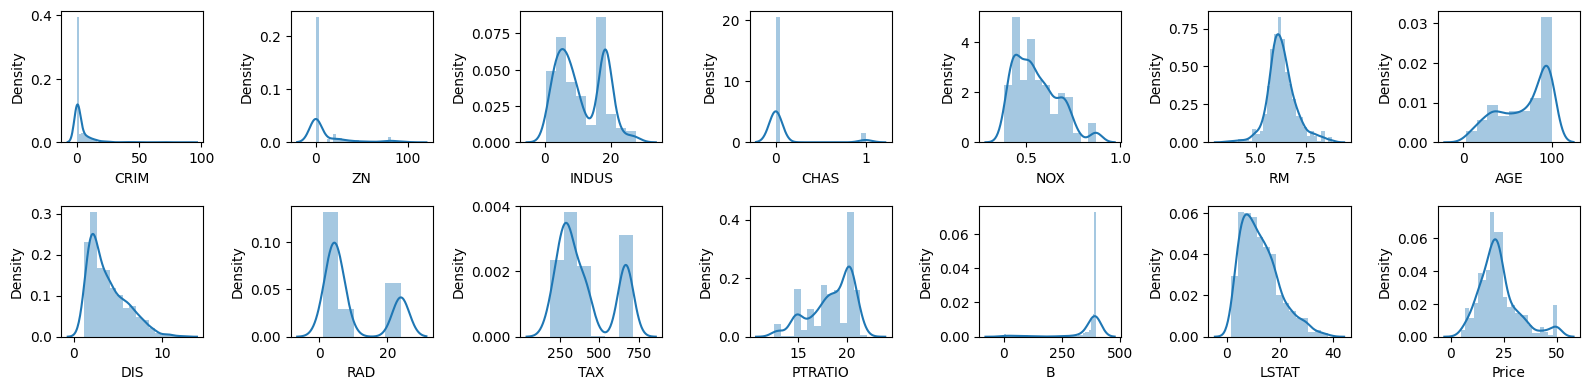

In [7]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows , ncols = cols , figsize = (16,4))

col = bost.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(bost[col[index]], ax = ax[i][j])
        index +=1 
plt.tight_layout()

We will use the heatmap function from the seaborn library to plot the correlation matrix. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

<AxesSubplot:>

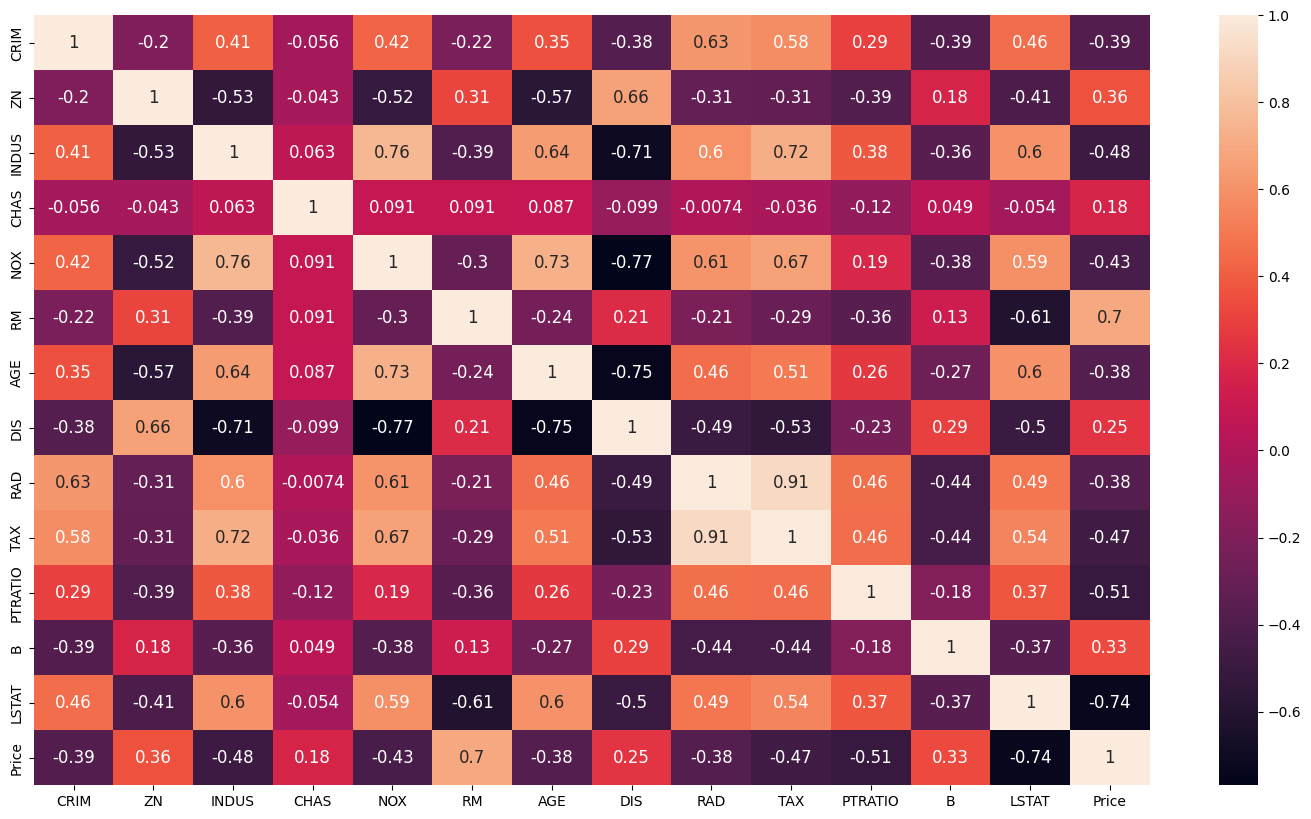

In [8]:
fig , ax = plt.subplots(figsize = (18,10))
corrdat = bost.corr()
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

### Feature selection

To fit a linear regression model, we select those features which have a high correlation with our target variable Price. Below getCorrelatedFeature function is used to find those features by comparing their absolute value of correlated features with threshold.

In [9]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df
threshold = 0.4
corr_value = getCorrelatedFeature(corrdat['Price'],threshold)
corr_value

,corr value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [10]:
#dataset contains only high correlation features with target variable price.
CD = bost[corr_value.index]
CD.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


## Scenario 1: Implement simple linear regression model. 

In [110]:
#create dataset for simple linear regression with one dependent and one independent feature.
simple_data=CD.iloc[:,5:]
simple_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


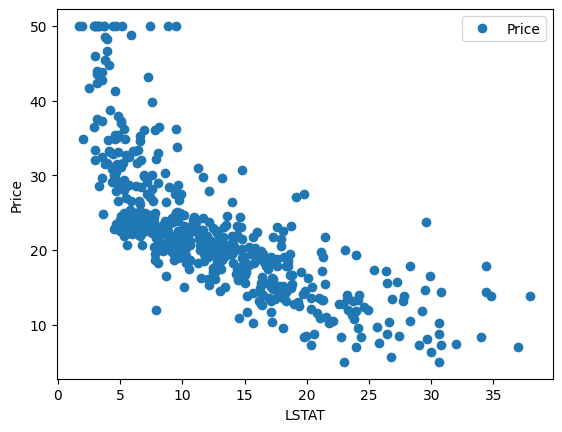

In [111]:
#visualise the change in variables
simple_data.plot(x='LSTAT',y='Price',style='o')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

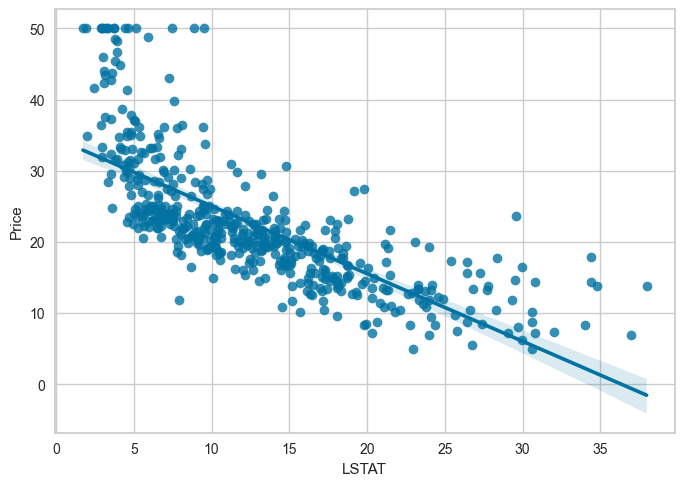

In [137]:
sns.regplot(x="LSTAT",
            y="Price", 
            data=simple_data)

In [112]:
#Divide data into dependent and independent variables into x and y
x = simple_data.drop(labels = ['Price'], axis = 1)
y = CD['Price']

### Spliting Data
split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0 )
x_train.shape , x_test.shape, y_train.shape,y_test.shape

((354, 1), (152, 1), (354,), (152,))

### Train simple linear regression model

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
predict = model.predict(x_test)

In [118]:
print('Best fit line has the intercept value of', model.intercept_)
print('Best fit line has the slope value of', model.coef_)

Best fit line has the intercept value of 34.789780590604124
Best fit line has the slope value of [-0.96814078]


In [119]:
#compare actual and predicted value of Price from simple linear regression.
simple_compare = pd.DataFrame({"Predicted":predict , "Actual": y_test})
simple_compare.head(10)

,Predicted,Actual
329,27.683627,22.6
371,25.563399,50.0
219,24.624302,23.0
403,15.649637,8.3
78,22.842923,21.2
15,26.589628,19.9
487,23.704569,20.6
340,25.795753,18.7
310,22.552481,16.1
102,24.498444,18.6


### Performance evaluation of simple linear regression

In [120]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print('R2 score of this model:', r2_score(y_test, predict))
print('Mean absolute error of this model:', mean_absolute_error(y_test, predict))
print('Mean squared error of this model:', mean_squared_error(y_test, predict))
print('Root mean squared error of this model:', np.sqrt(mean_squared_error(y_test, predict)))

R2 score of this model: 0.5218049526125568
Mean absolute error of this model: 4.4883446998468415
Mean squared error of this model: 39.81715050474416
Root mean squared error of this model: 6.310083240714354


## Scenario 2: Implement Multiple linear regression model. 

In [121]:
#divide dataset into dependent and independent variable
x_mult = CD.drop(labels = ['Price'], axis = 1)
y_mult = CD['Price']

In [70]:
#Spliting Data into train and test
from sklearn.model_selection import train_test_split
xm_train, xm_test , ym_train, ym_test = train_test_split(x_mult, y_mult, test_size = 0.3, random_state = 0 )
xm_train.shape , xm_test.shape, ym_train.shape,ym_test.shape

((354, 6), (152, 6), (354,), (152,))

### Train multiple linear regression model

In [122]:
from sklearn.linear_model import LinearRegression
mult_model = LinearRegression()
mult_model.fit(xm_train , ym_train)
mult_predict = mult_model.predict(xm_test)

In [123]:
#compare actual and predicted value of Price from multiple linear regression.
multi_compare = pd.DataFrame({"Predicted":mult_predict , "Actual": ym_test})
multi_compare.head(5)

,Predicted,Actual
329,26.714224,22.6
371,21.137181,50.0
219,27.062076,23.0
403,11.609654,8.3
78,22.859885,21.2


### Performance evaluation of multiple linear regression

In [124]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print('R2 score of multiple LR model:', r2_score(ym_test, mult_predict))
print('Mean absolute error of multiple LR model:', mean_absolute_error(ym_test, mult_predict))
print('Mean squared error of multiple LR model:', mean_squared_error(ym_test, mult_predict))
print('Root mean squared error of multiple LR model:', np.sqrt(mean_squared_error(ym_test, mult_predict)))

R2 score of multiple LR model: 0.5923183733172352
Mean absolute error of multiple LR model: 3.9982863119708782
Mean squared error of multiple LR model: 33.94581515708274
Root mean squared error of multiple LR model: 5.826303730246368
